# Heart Failure Prediction using Support Vector Machine With undersampling

The Heart Failure Clinical Records dataset contains 12 features collected from 299 patients with heart failure. These features include various clinical measurements like age, ejection fraction, serum creatinine, and time, which are used to predict whether the patient survived heart failure (the target variable is DEATH_EVENT). The dataset was sourced from a public clinical study, primarily focusing on cardiovascular diseases, and was shared by Andrew MVD on Kaggle. It aims to facilitate research in predicting heart failure outcomes using machine learning models.

### Dataset Description

- **Age**: Age of the patient (years).
- **Anaemia**: Presence of a reduction in red blood cells (1 = Yes, 0 = No).
- **Creatinine Phosphokinase (CPK)**: Level of CPK enzyme in blood (mcg/L).
- **Diabetes**: Indicates if the patient has diabetes (1 = Yes, 0 = No).
- **Ejection Fraction**: Percentage of blood leaving the heart each contraction (%).
- **High Blood Pressure**: If the patient has hypertension (1 = Yes, 0 = No).
- **Platelets**: Platelets count in blood (kiloplatelets/mL).
- **Serum Creatinine**: Level of creatinine in the blood (mg/dL).
- **Serum Sodium**: Sodium level in the blood (mEq/L).
- **Sex**: Gender of the patient (1 = Male, 0 = Female).
- **Smoking**: Whether the patient smokes (1 = Yes, 0 = No).
- **Time**: Follow-up period (days).
- **Death Event**: Whether the patient died during the follow-up period (1 = Yes, 0 = No).

Source: [Kaggle Heart Failure Dataset](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)


## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


## Load Data

In [2]:
with open('../data/dataset-metadata.json', 'r') as file:
    metadata = json.load(file)

print(json.dumps(metadata, indent=4))

{
    "id": "andrewmvd/heart-failure-clinical-data",
    "id_no": 727551,
    "datasetSlugNullable": "heart-failure-clinical-data",
    "ownerUserNullable": "andrewmvd",
    "usabilityRatingNullable": 1.0,
    "titleNullable": "Heart Failure Prediction",
    "subtitleNullable": "12 clinical features por predicting death events.",
    "descriptionNullable": "# About this dataset\n&gt; Cardiovascular diseases (CVDs) are the **number 1 cause of death globally**, taking an estimated **17.9 million lives each year**, which accounts for **31% of all deaths worlwide**.\nHeart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.\n\n&gt; Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.\n\n&gt; People with cardiovascular disease or who are at high card

In [3]:
HFP_df = pd.read_csv('../data/heart_failure_clinical_records_dataset.csv')
HFP_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
print(HFP_df.shape)
print(f"Heart Failure Prediction Dataset: \nconsists of {HFP_df.shape[0]} rows and {HFP_df.shape[1]} columns")

(299, 13)
Heart Failure Prediction Dataset: 
consists of 299 rows and 13 columns


In [5]:
HFP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
HFP_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
print(HFP_df['DEATH_EVENT'].value_counts())

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


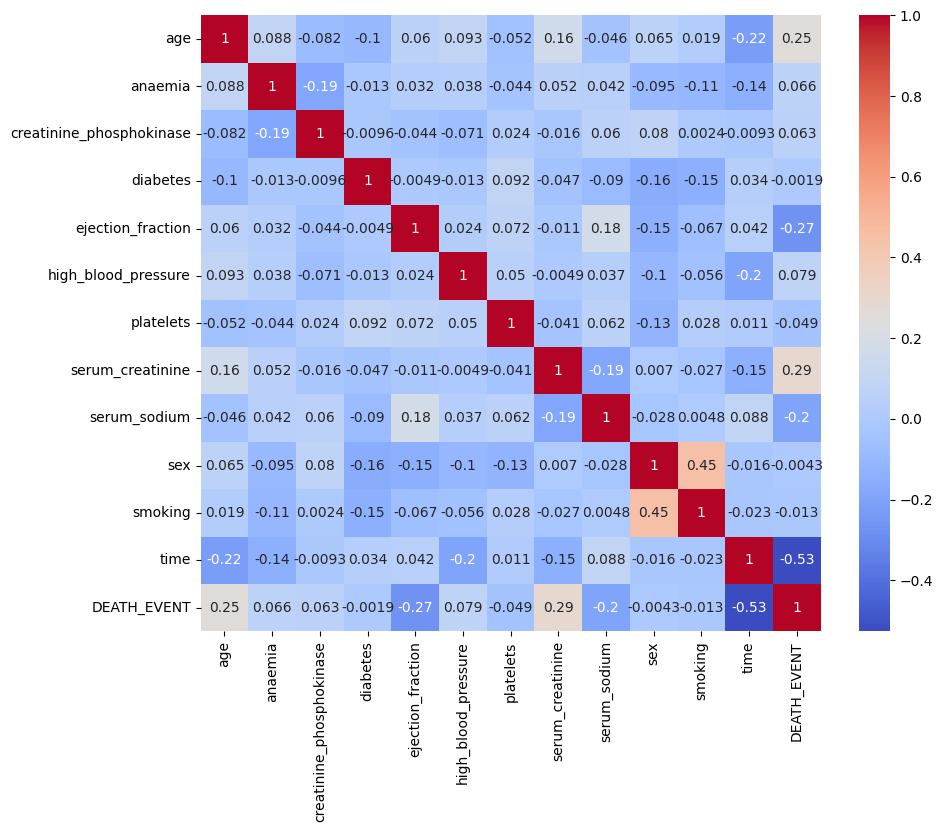

Highly Correlated Features:  []


In [8]:
# Calculate correlation matrix
correlation_matrix = HFP_df.corr()

# Plot heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Find highly correlated features
# We will focus on correlations greater than 0.8
high_corr_var = np.where(np.abs(correlation_matrix) > 0.8)
high_corr_var = [(correlation_matrix.index[x], correlation_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y]

print("Highly Correlated Features: ", high_corr_var)


## Data Preprocessing

In [9]:
HFP_df_processed = HFP_df.copy()
HFP_df_processed.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#### Checking Null Values

In [10]:
HFP_df_processed.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### Checking NaN Values

In [11]:
HFP_df_processed.isna().sum()


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### Balancing out the value count of DEATH_EVENT using SMOTE (Synthetic Minority Over-sampling Technique)

In [12]:
from imblearn.under_sampling import RandomUnderSampler

X = HFP_df_processed.drop('DEATH_EVENT', axis=1)
y = HFP_df_processed['DEATH_EVENT']

print(f"Dataset DEATH_EVENT value counts: \n{HFP_df['DEATH_EVENT'].value_counts()}")

# Apply undersampling to balance the training data
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X, y)

# Check class distribution after applying undersampling
print(f"\nDataset DEATH_EVENT value counts after undersampling: \n{y_under.value_counts()}")


Dataset DEATH_EVENT value counts: 
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

Dataset DEATH_EVENT value counts after undersampling: 
DEATH_EVENT
0    96
1    96
Name: count, dtype: int64


#### Splitting the dataset into training and test sets

In [13]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

#### Scaling the data using StandardScaler

In [14]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (do not fit again!)
X_test_scaled = scaler.transform(X_test)

## Hyperparameter Tuning

### Using GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Initialize the SVM model
svm = SVC()

# Initialize GridSearchCV with the SVM model and the parameter grid
grid_search = GridSearchCV(svm, param_grid, refit=True, verbose=2, cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found by GridSearchCV
print(f"Best parameters found: {grid_search.best_params_}")

# Use the best estimator to make predictions
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_scaled)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, 

### Using Optuna

In [16]:
import optuna
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Define the objective function for Optuna
def objective(trial):
    # Suggest values for hyperparameters
    C = trial.suggest_loguniform('C', 1e-3, 1e2)  # Log scale for C
    gamma = trial.suggest_loguniform('gamma', 1e-3, 1e1)  # Log scale for gamma
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])  # Choose between linear and rbf kernels

    # Create the SVC model with suggested hyperparameters
    model = SVC(C=C, gamma=gamma, kernel=kernel, random_state=42)

    # Evaluate the model using cross-validation
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()

    return score  # Optuna tries to maximize this score

# Create a study and optimize it
study = optuna.create_study(direction='maximize')  # We're trying to maximize accuracy
study.optimize(objective, n_trials=1000)  # Perform 100 trials (you can adjust this)

# Print the best hyperparameters
print(f"Best parameters: {study.best_params}")
print(f"Best cross-validation accuracy: {study.best_value}")



c:\Users\angel\AppData\Local\pypoetry\Cache\virtualenvs\heart-failure-prediction-svm-7gLMnBzH-py3.10\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-11-01 10:56:40,324] A new study created in memory with name: no-name-fe3a2a42-e7a7-439d-ab7f-130c5759896a
C:\Users\angel\AppData\Local\Temp\ipykernel_14256\1318247695.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e2)  # Log scale for C
C:\Users\angel\AppData\Local\Temp\ipykernel_14256\1318247695.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3

Best parameters: {'C': 99.34326521143345, 'gamma': 0.0054153843400435425, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.823010752688172


### Using Hyperopt

In [17]:
from hyperopt import fmin, tpe, hp, Trials
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Define the search space for hyperparameters
space = {
    'C': hp.loguniform('C', -3, 2),  # C in range [0.001, 100]
    'gamma': hp.loguniform('gamma', -3, 1),  # gamma in range [0.001, 10]
    'kernel': hp.choice('kernel', ['linear', 'rbf'])  # Kernel can be 'linear' or 'rbf'
}

# Define the objective function for Hyperopt
def objective(params):
    model = SVC(C=params['C'], gamma=params['gamma'], kernel=params['kernel'], random_state=42)
    
    # Evaluate the model using cross-validation
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()

    # We minimize the negative of accuracy because Hyperopt minimizes objective functions
    return -score

# Initialize trials object to track progress
trials = Trials()

# Run the optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=1000, trials=trials)

# Print the best parameters
print(f"Best parameters: {best}")

# Convert the results into a usable format
best_params = {
    'C': best['C'],
    'gamma': best['gamma'],
    'kernel': ['linear', 'rbf'][best['kernel']]  # Hyperopt returns an index for categorical parameters
}




100%|██████████| 1000/1000 [00:27<00:00, 36.08trial/s, best loss: -0.7711827956989247]
Best parameters: {'C': np.float64(1.3066362052553993), 'gamma': np.float64(0.5468463489634142), 'kernel': np.int64(0)}


## Model Training

In [18]:
# Initialize the SVM model
svm_model = SVC(kernel='rbf', gamma=0.1, C=1,random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)



In [19]:
# optuna

# Train the model with the best hyperparameters
best_svm_model_optuna = SVC(**study.best_params)
best_svm_model_optuna.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_svm_model_optuna.predict(X_test_scaled)

In [20]:
# hyperopt

# Train the model with the best hyperparameters
best_svm_model_hyperopt = SVC(**best_params)
best_svm_model_hyperopt.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_svm_model_hyperopt.predict(X_test_scaled)

## Model Evaluation

In [21]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  4]
 [ 2 19]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        18
           1       0.83      0.90      0.86        21

    accuracy                           0.85        39
   macro avg       0.85      0.84      0.84        39
weighted avg       0.85      0.85      0.85        39



In [22]:
y_pred_optuna = best_svm_model_optuna.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred_optuna))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred_optuna))


              precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
           1       0.83      0.95      0.89        21

    accuracy                           0.87        39
   macro avg       0.88      0.87      0.87        39
weighted avg       0.88      0.87      0.87        39

[[14  4]
 [ 1 20]]


In [23]:
y_pred_hyperopt = best_svm_model_hyperopt.predict(X_test_scaled)

# Print classification report
print(classification_report(y_test, y_pred_hyperopt))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred_hyperopt))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79        18
           1       0.79      0.90      0.84        21

    accuracy                           0.82        39
   macro avg       0.83      0.81      0.82        39
weighted avg       0.83      0.82      0.82        39

[[13  5]
 [ 2 19]]


In [24]:
from sklearn.model_selection import cross_val_score

def cross_validate_model(model, X, y, cv=5):
    """
    Perform cross-validation on the given model with the provided data.
    
    Parameters:
    - model: The machine learning model to be evaluated.
    - X: Features dataset.
    - y: Target variable.
    - cv: Number of cross-validation folds (default is 5).
    
    Returns:
    - Cross-validation scores.
    """
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=cv)
    
    # Print the cross-validation scores
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean cross-validation score: {cv_scores.mean():.4f}")
    
    return cv_scores

In [25]:
# Evaluate the original SVM model
print("Evaluation of the original SVM model:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Evaluate the Optuna-optimized SVM model
print("Evaluation of the Optuna-optimized SVM model:")
y_pred_optuna = best_svm_model_optuna.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_optuna))
print(classification_report(y_test, y_pred_optuna))

# Evaluate the Hyperopt-optimized SVM model
print("Evaluation of the Hyperopt-optimized SVM model:")
y_pred_hyperopt = best_svm_model_hyperopt.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_hyperopt))
print(classification_report(y_test, y_pred_hyperopt))

Evaluation of the original SVM model:
[[14  4]
 [ 2 19]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        18
           1       0.83      0.90      0.86        21

    accuracy                           0.85        39
   macro avg       0.85      0.84      0.84        39
weighted avg       0.85      0.85      0.85        39

Evaluation of the Optuna-optimized SVM model:
[[14  4]
 [ 1 20]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
           1       0.83      0.95      0.89        21

    accuracy                           0.87        39
   macro avg       0.88      0.87      0.87        39
weighted avg       0.88      0.87      0.87        39

Evaluation of the Hyperopt-optimized SVM model:
[[13  5]
 [ 2 19]]
              precision    recall  f1-score   support

           0       0.87      0.72      0.79        18
           1       0.79      0.90      0.84     

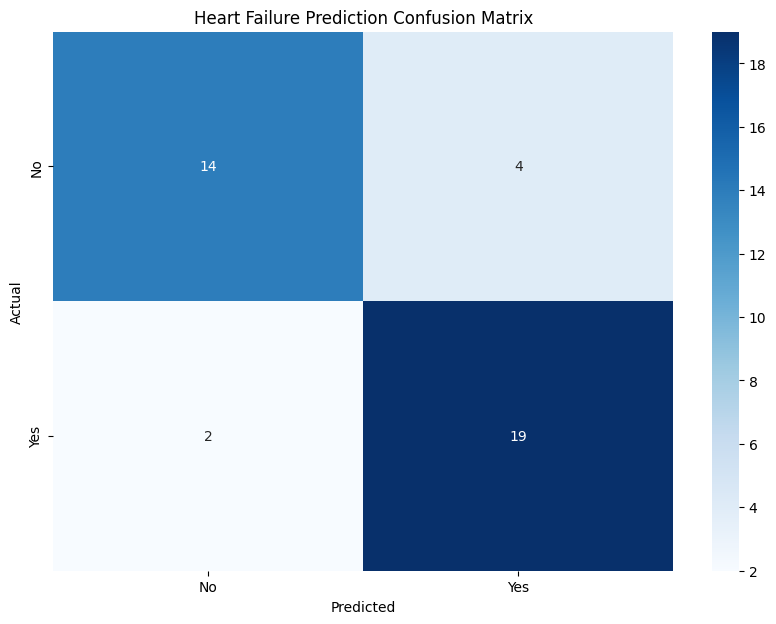

In [26]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heart Failure Prediction Confusion Matrix')
plt.show()

In [27]:
def predict_new_patient(scaler, svm_model, new_patient_data):
    """
    Scale the new patient data and make predictions using the trained SVM model.
    
    Parameters:
    - scaler: The fitted scaler used for scaling the data.
    - svm_model: The trained SVM model for making predictions.
    - new_patient_data: A DataFrame containing the new patient's data.
    
    Returns:
    - Predictions for the new patient data.
    """
    # Scale the new data using the same scaler
    new_data_scaled = scaler.transform(new_patient_data)

    # Make predictions
    predictions = svm_model.predict(new_data_scaled)

    return predictions

# Example usage
new_data = pd.DataFrame({
    'age': [50],
    'anaemia': [0],  # No
    'creatinine_phosphokinase': [25],
    'diabetes': [0],  # No
    'ejection_fraction': [60],
    'high_blood_pressure': [0],  # No
    'platelets': [300],
    'serum_creatinine': [1.0],
    'serum_sodium': [140],
    'sex': [0],  # Female
    'smoking': [0],  # No
    'time': [90]
})

# Call the function to get predictions
new_predictions = predict_new_patient(scaler, svm_model, new_data)

# Output the predictions
print(new_predictions)


[1]


In [28]:
# Example input that may lead to heart failure prediction
heart_failure_data = pd.DataFrame({
    'age': [70],
    'anaemia': [1],  # Yes
    'creatinine_phosphokinase': [500],
    'diabetes': [1],  # Yes
    'ejection_fraction': [30],
    'high_blood_pressure': [1],  # Yes
    'platelets': [150],
    'serum_creatinine': [2.5],
    'serum_sodium': [130],
    'sex': [1],  # Male
    'smoking': [1],  # Yes
    'time': [120]
})

# Call the function to get predictions
heart_failure_predictions = predict_new_patient(scaler, svm_model, heart_failure_data)

# Output the predictions
print(heart_failure_predictions)


[1]


## Export Model

In [29]:
import joblib
from datetime import datetime

# Assuming these are your trained model and scaler
best_svm_model = svm_model  # your trained SVM model
scaler = scaler  # your fitted scaler

# Get the current date and time
now = datetime.now()

# Format the date and time as needed
date_time_str = now.strftime("%m-%d-%Y_%I%M%p")

# Create filenames with date and time
model_filename = f"../models/model/{date_time_str}_SVMmodel.pkl"
scaler_filename = f"../models/scaler/{date_time_str}_scaler.pkl"

# Save the model and scaler
joblib.dump(best_svm_model, model_filename)  # Save the SVM model
joblib.dump(scaler, scaler_filename)          # Save the scaler


['../models/scaler/11-01-2024_1057AM_scaler.pkl']

In [30]:

# Load the model
loaded_model = joblib.load(model_filename)

# Make predictions using the loaded model
new_predictions = predict_new_patient(scaler, loaded_model, new_data)
print(new_predictions)

[1]


In [31]:
print(type(loaded_model))  # This should output something like <class 'sklearn.svm._classes.SVC'>


<class 'sklearn.svm._classes.SVC'>
